# Probabilités et statistiques Domaine: Regression lineaire et non lineaire 

### 1 STATISTIQUE DESCRIPTIVE UNIVARIEE


##### 1.1 NOMBRE D’ENFANTS PAR FEMME

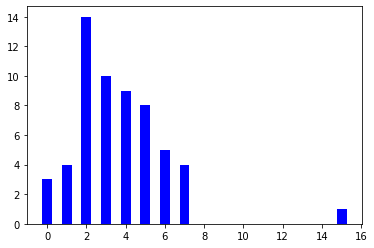

In [368]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure()

nb_enfants = [0,1,2,3,4,5,6,7,15]
nb_femmes = [3,4,14,10,9,8,5,4,1]
width = 0.5


plt.bar(nb_enfants, nb_femmes, width, color='b' )

plt.savefig('SimpleBar.png')
plt.show()

In [369]:


# Pour trouver les frequences 
# on a besoin de la somme des effectifs
# comme on a déja les effectifs qui est le array (nb_femmes), on peut les calculer
# on prends chaque element de l'array et on le divise à la somme des effectifs
# et on ajoute le resultat à la liste frequences

# On va faire le calcul pour le premier élément de la liste 
# 3/58 = 0.05172413793103448 pour les restes c'est le meme principe.
    
def effectif_to_frequence(effectifs: list) -> list:
    """A partir d’une liste d’effectifs
        retourne la liste des fréquences"""
    n = len(effectifs)
    frequences = []
    S = sum(effectifs)
    for k in range(n):
        frequences += [ effectifs[k]/S ]
    return frequences


# Pour trouver les frequences cumules
# on prends le premier element de la liste frequences et on l'ajout dans la liste des frequences cumulés 
# le deuxième element de la liste frequences cumules est le premier element + le deuxième element de la liste frequences
# le troixième element de la liste frequences cumules est le premier element + le deuxième element de la liste frequences + le troisième element de la liste frequences
# ainsi de suite ... 

def frequence_to_frequence_cumule(F):
    C = [F[0]]
    for i in range(1,len(F)):
        C += [ C[-1] + F[i] ]
    return C

In [370]:
frequences = effectif_to_frequence(nb_femmes)
frequencs_cumules = frequence_to_frequence_cumule(frequences)

print(f"""
freq = {frequences}
freq_cumule = {frequencs_cumules},""")


freq = [0.05172413793103448, 0.06896551724137931, 0.2413793103448276, 0.1724137931034483, 0.15517241379310345, 0.13793103448275862, 0.08620689655172414, 0.06896551724137931, 0.017241379310344827]
freq_cumule = [0.05172413793103448, 0.12068965517241378, 0.3620689655172414, 0.5344827586206897, 0.6896551724137931, 0.8275862068965518, 0.913793103448276, 0.9827586206896554, 1.0000000000000002],


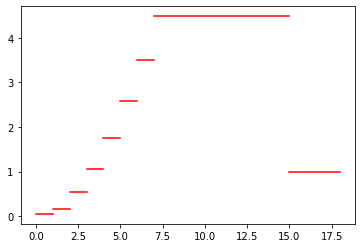

In [371]:
def courbes_freq_cumul(X,F):
    """list(float),list(float)->list(float)
        les deux listes X et E sont de m^eme longueur
        trace une courbe"""
    n = len(X)
    S = 0
    for i in range(n-1):
        S = S + F[i]
        plt.plot([X[i],X[i+1]],[S,S], color='r')
    plt.plot([X[n-1],X[n-1]+3],[1,1], color='r')
    
courbes_freq_cumul(nb_enfants,frequencs_cumules)


In [372]:
# Pour trouver la moyenne on fait la somme des éléments de la liste et on divise par le nombre d'éléments

def moyenne(X):
    """list(float)->float"""
    n = len(X)
    m = X[0]
    for i in range(1,n):
        m += X[i]
    return m/n

moyenne_femmes = moyenne(sorted(nb_femmes))
moyenne_enfants = moyenne(sorted(nb_enfants))

# pour trouver la mediane 
# si le nombre des elements est impair alors med = X[N+1/2]
# si le nombre des elements est pair on a la formule 1/2(X[n/2] + X[(n/2)+1])/2 

def mediane(liste):
    length = len(liste)
    if length%2 == 1:
       return liste[(length-1)//2]
    else:
        return (liste[(length-2)//2]+liste[length//2])/2 
mediane_femmes = mediane(nb_femmes)
mediane_enfants = mediane(nb_enfants)

# Mode : La valeur la plus fréquente d'une série statistique — C'est la (ou les) valeur(s) du caractère dont l’effectif est le plus grand.
# il y a plusieurs facon de trouver le mode le plus simple ca sera juste de regarder la liste des effectifs et de regarder quel est le plus grand effectif
# On observe bien que c'est le numéro 2 qui a le plus grand effectif



print(f"""      
      La moyenne des femmes est de {moyenne_femmes}. 
      La moyenne des enfants est de {moyenne_enfants}.
      la mediane des femmes est de {mediane_femmes}.
      La mediane des enfants est de {mediane_enfants}. 
      Le mode est de 2.""")


      
      La moyenne des femmes est de 6.444444444444445. 
      La moyenne des enfants est de 4.777777777777778.
      la mediane des femmes est de 9.
      La mediane des enfants est de 4. 
      Le mode est de 2.


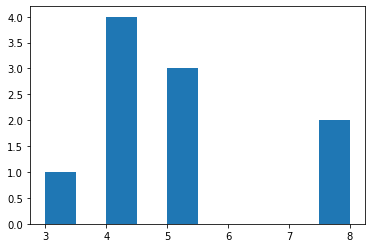


      algorithme 95.0 % intervalle de confience 3.225 et 8.0
      T distribution intervalle de confience 3.4759994491672406 et 9.41288943972165
       


In [373]:
# intervalle de confience 
# Premièrement on va calculer la moyenne = 6.444444444444445. et l'écart type = 3.8618104882183926 de cet échantillon.
# Choisissez votre degré de confiance = 95%
# On a 9 elements donc on a 9-1 = 8 degree of freedom 
# (1 – 0.95) / 2 = 0.025
# avec le degree of freedom de 8 et alpha =0.025 on peut trouver dans le tablea de distribution T = 2.306
# On divise l'ecart type = 3.8618104882183926 avec le sqrt(9) = 3  1,287270162739464e16
# on multiplie 2.306 par 1,287270162739464e16 = 2,968444995277204
# lower bond = 6.444444444444445 - 2.968444995277204 = 3.4759994491672406
# upper bond = 6.444444444444445 + 2.968444995277204 = 9.41288943972165

import numpy 
from sklearn.utils import resample 
  
x = numpy.array(nb_femmes) 
  
n_iterations = 10
n_size = int(len(x)) 
  
medians = list() 
for i in range(n_iterations): 
   s = resample(x, n_samples=n_size); 
   m = numpy.median(s); 
   medians.append(m) 
  
plt.hist(medians) 
plt.show() 
  
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p) 
  
print(f"""
      algorithme {alpha*100} % intervalle de confience {lower} et {upper}
      T distribution intervalle de confience { 3.4759994491672406} et {9.41288943972165}
       """)


In [374]:
# pour trouver le interquartile on a besoin de quartile 3 et quartile 1 
# Le troisième quartile Q3 est la plus petite valeur de la série telle qu'au moins 75% des
# valeurs sont inférieures ou égales à Q3.
# Le premier quartile Q1 est la plus grande valeur de la série telle qu'au moins 25% des
# Donc Q1 = 1/4 * (effectif total) = 4 
# Q3 = 3/4 * (effectif total)= 9
# L' interquartile = Q3 - Q1 = 9 - 4 = 5

q3, q1 = np.percentile(nb_femmes, [75 ,25])
iqr = q3 - q1
iqr

# L’étendue est la différence entre la plus grande valeur et la plus petite valeur
entendue = 15 -np.mean(nb_enfants)

print(f""" 
        L'entendue est de {entendue}.
        Q3 est de {q3}.
        q1 est de {q1}.
        l'espace interquartile est de {iqr}
        l'écart type est de {np.std(nb_femmes)}
        l'écart moyen absolu est de {np.mean(np.absolute(nb_femmes - np.mean(nb_femmes)))}
    """)



 
        L'entendue est de 10.222222222222221.
        Q3 est de 9.0.
        q1 est de 4.0.
        l'espace interquartile est de 5.0
        l'écart type est de 3.8618104882183926
        l'écart moyen absolu est de 3.382716049382716
    


{'whiskers': [<matplotlib.lines.Line2D at 0x1331af2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1331af100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1331af970>],
 'medians': [<matplotlib.lines.Line2D at 0x13318e610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1330a3760>],
 'means': []}

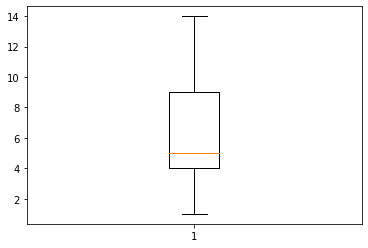

In [375]:
# Boite a moustache 
plt.boxplot(nb_femmes)

In [376]:
#  Find the outliers 
q3, q1 = np.percentile(nb_enfants, [75 ,25])
iqr = q3 - q1
iqr
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

print(f"""
      lower_bound = {lower_bound} et upper_bound = {upper_bound},
      toutes les valeurs qui ne sont pas comprises dans cet 
      intervalle sont des outliers,par cosequent on obtient
      un outlier qui est {nb_enfants[-1]}""")


      lower_bound = -4.0 et upper_bound = 12.0,
      toutes les valeurs qui ne sont pas comprises dans cet 
      intervalle sont des outliers,par cosequent on obtient
      un outlier qui est 15


In [377]:
# Pearson’s premier coefficient d'asymetrie est un indicateur de la dispersion des données.
# Pour le calculer, on doit faire le calcul (moyenne - mode) / écart-type.
pearson_coef = (np.mean(nb_femmes) - 2) / np.std(nb_femmes)

pearson_second_coef = 3*(moyenne_femmes - mediane_femmes) / np.std(nb_femmes)

print(f"""Pearson’s premier coefficient d’asymétrie est de {pearson_coef},
      pearson’s second coefficient d’asymétrie est de {pearson_second_coef} 
      On peut donc déduire que les données sont très asymétriques.""")

# Pour calculer le coefficient kurtosis, on doit faire plusieurs calculs. 
# Étape 1 : Tout d'abord, après avoir formé la distribution des données, on détérmine le nombre de variables dans la distribution, désigné par "n".

# Étape 2 : Ensuite, calculer la moyenne de la distribution, qui est l'agrégat de toutes les variables (Yi) de la distribution divisé par le
# nombre de variables de la distribution (n). Elle est désignée par Ȳ.
# Ȳ = ΣYi / n
#

# Étape 3 : Ensuite, on détérmine le quatrième moment de la distribution en additionnant la puissance quatrième de l'écart entre chaque variable
# et la moyenne (étape 2) qui est ensuite divisée par le nombre de variables dans la distribution (étape 1).

#Quatrième moment = Σ(Yi - Ȳ)^4 / n

#Étape 4 : Ensuite, on détérmine la variance (s2) ou deuxième moment de la distribution en additionnant le carré de l'écart entre chaque variable et 
# la moyenne (étape 2) qui est ensuite divisé par le nombre de variables dans la distribution (étape 1).

##s2 = Σ(Yi - Ȳ)2 / n

#Étape 5 : Enfin, la formule du kurtosis peut être dérivée en divisant le quatrième moment (étape 3) par le deuxième moment au carré de la distribution 
# (étape 4), comme indiqué ci-dessous.

#Kurtosis = Σi(Yi - Ȳ)^4 / (Σi(Yi - Ȳ)^2)^2

n = len(nb_femmes)
moyenne_distribution = np.mean(nb_femmes)
std_by_variable = [nb_femmes[0] - moyenne_distribution, nb_femmes[1] - moyenne_distribution, nb_femmes[2] - moyenne_distribution, nb_femmes[3] - moyenne_distribution,
                                  nb_femmes[4] - moyenne_distribution, nb_femmes[5] - moyenne_distribution, nb_femmes[6] - moyenne_distribution, nb_femmes[7] - moyenne_distribution,
                                  nb_femmes[8] - moyenne_distribution
                                 ]
std_second = np.array([std_by_variable]) **2
second_moment = np.sum(std_second)/n
std_fourth = np.array([std_by_variable]) **4
fourth_moment = np.sum(std_fourth)/ n
kurtosis = ( fourth_moment) / (second_moment )**2


print(kurtosis)
f"""
kurtosis = {kurtosis}
Puisque le kurtosis de la distribution est inférieur à 3, cela signifie qu'il s'agit d'une distribution platykurtique.
"""
# On peut aussi utiliser la fonction skew() qui renvoie le coefficient de la symétrie de la série.
# Cette fonction renvoie un nombre entre -1 et 1.
# Si le coefficient est négatif, les données sont asymétriques vers la gauche.
# Si le coefficient est positif, les données sont asymétriques vers la droite.
# Si le coefficient est nul, les données sont symétriques.
# On peut aussi utiliser la fonction kurtosis() qui renvoie le coefficient de la kurtosis de la série.
# Cette fonction renvoie un nombre entre -3 et 3.
# Si le coefficient est < 3 , les données sont platykurtic.
# Si le coefficient est > 3  , les données sont Leptokurtiques.
# Si le coefficient est = 3 , les données sont Mesokurtique.


df = pd.DataFrame(nb_femmes, columns=['femmes'], index=nb_enfants)
skew = df.skew(axis = 0, skipna = True)
kurt = df.kurtosis(axis = 0, skipna = True)

print(f"Algorithm skewness = {skew[0]} et kurtosis = {kurt[0]}")
print(f"kurtosis est -0.23009329164761017 Platykurtic Distribution")


Pearson’s premier coefficient d’asymétrie est de 1.150870675296872,
      pearson’s second coefficient d’asymétrie est de -1.9852519148871042 
      On peut donc déduire que les données sont très asymétriques.
2.2792010218850045
Algorithm skewness = 0.6132862266278487 et kurtosis = -0.23009329164761017
kurtosis est -0.23009329164761017 Platykurtic Distribution


1) Le nombre de nombre d 'enfants par femme suit elle la loi normale de moyenne m et d'écart type std ?

    Oui elle suit la loi normale 

2) Le nombre de nombre d 'enfants par femme suit elle la loi de poisson de moyenne 1/m? 

    Non elle ne suit pas une loi de poisson de moyenne 1/m loi de poisson s'utilise plutot pour les événements rares

3) Le nombre de nombre d 'enfants par femme suit elle la loi exponentielle?
  
   None dans notre cas on ne suit pas une loi exponentielle
   

### 2 PARAMETRIQUE 

#### 2.1 CINEMA 

In [378]:

# Pour calculer l'intervalle de confience d'une proportion, on doit faire plusieurs calculs.
# n = 144
# x = nombre des clients qui sont interessé 144* 0.54 = 77,8
# p = 77,8/144 = 0,54 est la proportion de l'échantillon ; c'est l'estimation ponctuelle de la proportion de la population.
# q = 1- p = 1 - 0,54 = 0,46
# Puisque le niveau de confiance demandé est CL = 0.90 ou 0.80  on a Z[a/2] = 1.96 ou 1.64 respectivement.
# On peut donc déduire que l'intervalle de confiance de 90% de la proportion est donc [p - Z[a/2]sqrt(p*q/n), p + Z[a/2]sqrt(p*q/n)] = [0,54 - 1,96*((0,54*0,46)/144),0,54 + 1,96*((0,54*0,46)/144)]
# upper_bond = 0.536619 lower_bond = 0.543381
# on fait le meme calcul pout un intervalle de confiance de 80% donc : [p - Z[a/2]sqrt(p*q/n), p + Z[a/2]sqrt(p*q/n)] = [0,54 - 1,64*((0,54*0,46)/144),0,54 + 1,64*((0,54*0,46)/144)]
# lower_bond = 0.537171 upper_bond = 0.542829


from scipy.stats import norm
def intervalle_confience(proportion: float, echantillon :int, conf_pourcentage:float ) -> list :

    # Il faut donner une proportion entre 0 et 1 et une taille d'échantillon 
    # proportion peut aussi correspondre à une liste de proportions
    proba = (1-((1-conf_pourcentage)/2))
    intervalle_confience  = (norm.ppf(proba)*((proportion*(1-proportion)/echantillon)**0.5) )
    return(intervalle_confience)

In [379]:
inteval_80= intervalle_confience(0.54, 144, 0.80)
inteval_90 = intervalle_confience(0.54, 144, 0.90)

f"""
Algorithme: intervalle de confiance 80% = +- {inteval_80} et intervalle de confiance 90% = +- {inteval_90}
Calcul manuel : intervalle de confiance 80% lower_bond = 0.537171 upper_bond = 0.542829
calcul manuel : intervalle de confiance 90% lower_bond = 0.536619 upper_bond = 0.543381
"""


'\nAlgorithme: intervalle de confiance 80% = +- 0.053226834079563974 et intervalle de confiance 90% = +- 0.06831590194321221\nCalcul manuel : intervalle de confiance 80% lower_bond = 0.537171 upper_bond = 0.542829\ncalcul manuel : intervalle de confiance 90% lower_bond = 0.536619 upper_bond = 0.543381\n'

### 3 TESTS PARAMETRIQUES

#### 3.1 INTOXICATIONS 

In [380]:
# estimations: 123 / 276 = 0,445652173913043 Milieu urbain
# 145/295 = 0,491525423728814 Milieu rural 
# on va calculer la la marge d'erreur 
# qui est de alpha = 5% 
# et alpha = 10%
# +- 1,96*((sqrt(0,491525423728814*(1-0,491525423728814))/sqrt(295)))) = +-0.0570496 = 5,7% (Rural, 5%)
# +- 1,96*((sqrt(0,445652173913043*(1-0,445652173913043))/sqrt(276)))) = +-0.0586396 = 5,86% (Urbain, 5%)
# +- 1,64*((sqrt(0,491525423728814*(1-0,491525423728814))/sqrt(295)))) = +-0.0477354 = 4,77% (Rural, 10%)
# +- 1,64*((sqrt(0,445652173913043*(1-0,445652173913043))/sqrt(276)))) = +-0.0474594 = 4,74% (Urbain, 10%)

# Donc pour Milieu urbain alpha = 5% on a ±16.2 [ 106.8 , 139.2 ] en pourcentage ±5.86% [ 38.70% , 50.43% ]
# Donc pour Milieu rural alpha = 5% on a ±16.8 [ 128.2 , 161.8 ] en pourcentage ±5.70% [ 43.45% , 54.86% ]
#... 

# Les differences ne sont pas très significatives pour les deux milieux.
# Comme notre echantillon est de 295 personnes, ~5 pourcent c'est ~ 16 personnes et c'est pas beaucoup. 
# Si on compare ls deux milieux on peut voir que leur difference est très faible.
# Aussi en comparant on observe que les deux milieux ont presque les memes proportions de personnes infectes.




### 4 STATISTIQUE BIVARIEE/ REGRESSION (NON) LINEAIRE

#### 4.1 COUT DE PRODUCTION

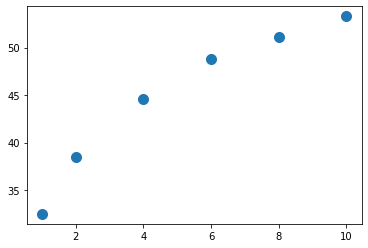

In [381]:
masse = [1,2,4,6,8,10]
cout = [32.5, 38.5, 44.6, 48.8, 51.1, 53.3] 
N = 6
area = (30 * np.random.rand(N))**2
colors = np.random.rand(N)
plt.scatter(masse, cout, s=100, alpha=1)
plt.show()


      On obtient un coefficient de correlation de 0.9598259532969325
      Les calculs sont detailles au maximum pour vous montrer que j'ai compris le calcul.
      

      covariance = 22.28333333333333
      variance = 5.1388888888888875
      BONUS On obtient une droite de regression classique de y en x de la forme y = 0.84x + 40.44
      

      La droite de regression de moindres carrés  x en y a donc pour équation
      BONUS x - 5.17 = 0.0000180439*(y-44.80)
      Ce qui donne y = -472.2 + 100 x
      

      Calculons maintenant la droite y/x des moindres carrés 
      y - 44.80 = 0.84*(x-5.17)
      ce qui nous donne y = 440.4572 + 0.84 x
      


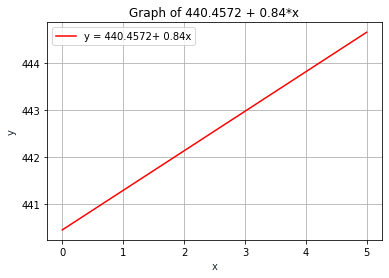

In [382]:
# On va commencer par trouver les moyennes d'échantillon 
masse = [1,2,4,6,8,10]
count = [32.5, 38.5, 44.6, 48.8, 51.1, 53.3]
moyenne_cout = (32.5 + 38.5 + 44.6 + 48.8 + 51.1 + 53.3)/6 
moyenne_masse = (1 + 2 + 4 + 6 + 8 + 10)/6 
distance_cout = [32.5 - moyenne_cout, 38.5 - moyenne_cout, 44.6 - moyenne_cout, 48.8 - moyenne_cout, 51.1 - moyenne_cout, 53.3 - moyenne_cout]
distance_masse = [1 - moyenne_masse, 2 - moyenne_masse, 4 - moyenne_masse, 6 - moyenne_masse, 8 - moyenne_masse, 10 - moyenne_masse]

somme_des_produits = (distance_masse[0]* distance_cout[0]) + (distance_cout[1]* distance_masse[1])  \
                    + (distance_cout[2]* distance_masse[2]) + (distance_cout[3]* distance_masse[3])  \
                    + (distance_cout[4]* distance_masse[4]) + (distance_cout[5]* distance_masse[5]) \


somme_des_produits_carre= ((distance_cout[0]**2) + (distance_cout[1]**2) + \
                                  (distance_cout[2]**2) + (distance_cout[3]**2) + \
                                  (distance_cout[4]**2) + (distance_cout[5]**2))* \
                                    ((distance_masse[0]**2) + (distance_masse[1]**2) +\
                                     (distance_masse[2]**2) + (distance_masse[3]**2) + \
                                     (distance_masse[4]**2) + (distance_masse[5]**2))


sqrt_somme_des_produits_carres = (somme_des_produits_carre)**0.5
    
coefficient = (somme_des_produits)/(sqrt_somme_des_produits_carres)
print(f"""
      On obtient un coefficient de correlation de {coefficient}
      Les calculs sont detailles au maximum pour vous montrer que j'ai compris le calcul.
      """)


# La droite de regression de y en x a pour équation y = ax + b avec a = cov(x,y)/(var(x))^2 et b = moyenne(y) - a*moyenne(x)

# One va commencer par la coviariance cov(x,y) = 1/n *sum(x,y) - moyenne(x)*moyenne(y)

cov= 1/6 * somme_des_produits

# variance^2 = 1/n (sum x^2 - moyenne(x)^2)

var_x = 1/6 * ((1**2 - moyenne_masse**2)+ (2**2 - moyenne_masse**2) + (4**2 - moyenne_masse**2) + (6 - moyenne_masse**2) + (8**2 - moyenne_masse**2) + (10**2 - moyenne_masse**2))

a = cov/var_x**2
b = moyenne_cout - a*moyenne_masse

print(f"""
      covariance = {cov}
      variance = {var_x}
      BONUS On obtient une droite de regression classique de y en x de la forme y = {"%.2f" % a}x + {"%.2f" % b}
      """)


# La droite de regression de x en y a donc pour équation x - moyenne_masse = a(cout - moyenne_cout)

var_y = 1/6 * (32.5**2 - moyenne_cout**2) + (38.5**2 - moyenne_cout**2) + (44.6**2 - moyenne_cout**2) + (48.8**2 - moyenne_cout**2) + (51.1**2 - moyenne_cout**2) + (53.3**2 - moyenne_cout**2)

print(f"""
      La droite de regression de moindres carrés  x en y a donc pour équation
      BONUS x - {"%.2f" % moyenne_masse} = {"%.10f" % (cov/(var_y)**2)}*(y-{"%.2f" % moyenne_cout})
      Ce qui donne y = -472.2 + 100 x
      """)

print(f"""
      Calculons maintenant la droite y/x des moindres carrés 
      y - {"%.2f" % moyenne_cout} = {"%.2f" % (cov/(var_x)**2)}*(x-{"%.2f" % moyenne_masse})
      ce qui nous donne y = 440.4572 + 0.84 x
      """)

x = np.linspace(0,5,50)

y_en_x = 440.4572 + 0.84*x

plt.plot(x, y_en_x, '-r', label='y = 440.4572+ 0.84x')
plt.title('Graph of 440.4572 + 0.84*x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')    
plt.legend(loc='upper left')
plt.grid()
plt.show()


#### Ajustement NON linéaire 1: régression exponentielle 


La forme du nuage suggère cependant une régression exponentielle.
 
 • Poser Y = ln(y). Calculer le coefficient de corrélation de x et Y.
  
  • Donner une équation de la droite de régression (D) de Y en x, obtenue par la méthode des moindres carrés.
   
   • En déduire l’expression de la régression exponentielle de y en x. 
   
   • Quelle serait avec cet ajustement exponentiel la valeur de la population en 2017 ?

In [383]:
moyenne_x = moyenne_masse 
y = [np.log(i) for i in cout]

moyenne_y = (sum(y))/6


distance_y = [ i - moyenne_y for i in y]
distance_x = distance_masse

somme_des_produits = (distance_y[0]* distance_x[0]) + (distance_y[1]* distance_x[1])  \
                    + (distance_y[2]* distance_x[2]) + (distance_y[3]* distance_x[3])  \
                    + (distance_y[4]* distance_x[4]) + (distance_y[5]* distance_x[5]) \

somme_des_produits_carre= ((distance_y[0]**2) + (distance_y[1]**2) + \
                          (distance_y[2]**2) + (distance_y[3]**2) + \
                          (distance_y[4]**2) + (distance_y[5]**2))* \
                          ((distance_x[0]**2) + (distance_x[1]**2) +\
                          (distance_x[2]**2) + (distance_x[3]**2) + \
                          (distance_x[4]**2) + (distance_x[5]**2))

sqrt_somme_des_produits_carres = (somme_des_produits_carre)**0.5
    
coefficient = (somme_des_produits)/(sqrt_somme_des_produits_carres)
print(f"""
      On obtient un coefficient de correlation de {coefficient}
      j'ai utlise des liste comprehension pour faire faire les calculs plus rapidement 
      """)


      On obtient un coefficient de correlation de 0.9398067024322149
      j'ai utlise des liste comprehension pour faire faire les calculs plus rapidement 
      


In [384]:
y = [3.48, 3.65, 3.79, 3.88, 3.93, 3.97]

cov= 1/6 * somme_des_produits

var_x = 1/6 * ((1**2 - moyenne_x**2)+ (2**2 - moyenne_x**2) + (4**2 - moyenne_x**2) + (6 - moyenne_x**2) + (8**2 - moyenne_x**2) + (10**2 - moyenne_x**2))


b = moyenne_cout - a*moyenne_x

print(f"""
      Calculons maintenant la droite y/x 
      y - {"%.2f" % moyenne_y} = {"%.4f" % (cov/(var_x)**2)}x*{"%.2f" % moyenne_x})
      ce qui nous donne y = 3.79 + 0.101332 x
      """)

# Pour ajuster un nuage de points à une courbe exponentielle , il suffit de faire le changement de variable Y = ln y , X = x , A = ln a , B = ln b. 
# ln(y)=ln(a)+ln(b)* x

# ln(y) = ln(0.101332)x + ln(3.79)




      Calculons maintenant la droite y/x 
      y - 3.79 = 0.0196x*5.17)
      ce qui nous donne y = 3.79 + 0.101332 x
      


#### Ajustement NON linéaire 2: régression puissance

• On suppose que le nuage suggère un ajustement puissance. Poser X = ln(x) et Y = ln(y). Calculer le coefficient de corrélation de Y et X.

• Déterminer l’équation de la droite de régression de Y en X par la méthode des moindres carrés. 

• En déduire l’expression de la régression puissance de y en x. 

• Quelle serait avec cet ajustement exponentiel la valeur de la population en 2017 ?

In [385]:
x =[np.log(i) for i in masse]
y = [np.log(i) for i in cout]

moyenne_y = (sum(y))/6
moyenne_x = (sum(x))/6

distance_y = [ i - moyenne_y for i in y]
distance_x = [ i - moyenne_x for i in x]

somme_des_produits = (distance_y[0]* distance_x[0]) + (distance_y[1]* distance_x[1])  \
                    + (distance_y[2]* distance_x[2]) + (distance_y[3]* distance_x[3])  \
                    + (distance_y[4]* distance_x[4]) + (distance_y[5]* distance_x[5]) \

somme_des_produits_carre= ((distance_y[0]**2) + (distance_y[1]**2) + \
                              (distance_y[2]**2) + (distance_y[3]**2) + \
                              (distance_y[4]**2) + (distance_y[5]**2))* \
                              ((distance_x[0]**2) + (distance_x[1]**2) +\
                              (distance_x[2]**2) + (distance_x[3]**2) + \
                              (distance_x[4]**2) + (distance_x[5]**2))

sqrt_somme_des_produits_carres = (somme_des_produits_carre)**0.5
    
coefficient = (somme_des_produits)/(sqrt_somme_des_produits_carres)
print(f"""
      On obtient un coefficient de correlation de {coefficient}
      j'ai utlise des liste comprehension pour faire faire les calculs plus rapidement 
      """)

##########################################################################################

y = [3.48, 3.65, 3.79, 3.88, 3.93, 3.97]
x = [0.0, 0.69, 1.38, 1.79, 2.07, 2.30]

cov= 1/6 * somme_des_produits

var_x = 1/6 * (0.0**2 - moyenne_x**2)+ (0.69**2 - moyenne_x**2) + (1.38**2 - moyenne_x**2) + (1.79**2 - moyenne_x**2) + (2.07**2 - moyenne_x**2) + (2.30**2 - moyenne_x**2)


print(f"""
      Calculons maintenant la droite y/x 
      y - {"%.2f" % moyenne_y} = {"%.4f" % (cov/(var_x)**2)}x*{"%.2f" % moyenne_x}
      ce qui nous donne y = 3.79 + 0.006624 x
      """)

# Pour ajuster un nuage de points à une courbe puissance, il suffit de faire le changement de variable Y = ln y , X = lnx , A = a , B = ln b ,
# ln(y)=a*x + ln(b) 

# ln(y) = 0.006624x + ln(3.79)
# y = 3.79 e^(0.006624 x)




      On obtient un coefficient de correlation de 0.9985260985056079
      j'ai utlise des liste comprehension pour faire faire les calculs plus rapidement 
      

      Calculons maintenant la droite y/x 
      y - 3.79 = 0.0048x*1.38
      ce qui nous donne y = 3.79 + 0.006624 x
      


#### Ajustement NON linéaire 3: régression logarithmique
• On suppose que le nuage suggère un ajustement logarithmique. Poser X = ln(x). Calculer le coefficient de corrélation de y et X. 

• Déterminer l’équation de la droite de régression de y en X par la méthode des moindres carrés. 

• En déduire l’expression de la régression logarithmique de y en x. 

• Quel serait avec cet ajustement logarithmique la valeur de la population en 2017 ?

In [386]:
x =[np.log(i) for i in masse]
y = count 

moyenne_y = (sum(y))/6
moyenne_x = (sum(x))/6

distance_y = [ i - moyenne_y for i in y]
distance_x = [ i - moyenne_x for i in x]

somme_des_produits = (distance_y[0]* distance_x[0]) + (distance_y[1]* distance_x[1])  \
                    + (distance_y[2]* distance_x[2]) + (distance_y[3]* distance_x[3])  \
                    + (distance_y[4]* distance_x[4]) + (distance_y[5]* distance_x[5]) \

somme_des_produits_carre= ((distance_y[0]**2) + (distance_y[1]**2) + \
                              (distance_y[2]**2) + (distance_y[3]**2) + \
                              (distance_y[4]**2) + (distance_y[5]**2))* \
                              ((distance_x[0]**2) + (distance_x[1]**2) +\
                              (distance_x[2]**2) + (distance_x[3]**2) + \
                              (distance_x[4]**2) + (distance_x[5]**2))

sqrt_somme_des_produits_carres = (somme_des_produits_carre)**0.5
    
coefficient = (somme_des_produits)/(sqrt_somme_des_produits_carres)
print(f"""
      On obtient un coefficient de correlation de {coefficient}
      j'ai utlise des liste comprehension pour faire faire les calculs plus rapidement 
      """)

##########################################################################################

y = [3.48, 3.65, 3.79, 3.88, 3.93, 3.97]
x = [0.0, 0.69, 1.38, 1.79, 2.07, 2.30]

cov= 1/6 * somme_des_produits

var_x = 1/6 * (0.0**2 - moyenne_x **2) + 1/6 * (0.69**2 - moyenne_x**2) + 1/6 * (1.38**2 - moyenne_x**2) + 1/6 * (1.79**2 - moyenne_x**2) + 1/6 * (2.07**2 - moyenne_x**2) + 1/6 * (2.30**2 - moyenne_x**2)


print(f"""
      Calculons maintenant la droite y/x 
      y - {"%.2f" % moyenne_y} = {"%.4f" % (cov/(var_x)**2)}x*{"%.2f" % moyenne_x}
      ce qui nous donne y =44.8 + 20.1085 x
      """)

# Pour ajuster un nuage de points à une courbe puissance, il suffit de faire le changement de variable Y = ln y , X = lnx , A = a , B = ln b ,
# ln(y)=a*x + ln(b) 

# ln(y) = 20.1085 x + ln(4.8)
# y = 4.8 exp(20.1085 x)


      On obtient un coefficient de correlation de 0.9996907347038261
      j'ai utlise des liste comprehension pour faire faire les calculs plus rapidement 
      

      Calculons maintenant la droite y/x 
      y - 44.80 = 14.5714x*1.38
      ce qui nous donne y =44.8 + 20.1085 x
      


### Conclusion 

Un Tp volumineux, pas très compliqué, beaucoup des petits calculs je sais que je me suis trompé quelque part mais je n'arrive pas à trouver à cause de la complexité des calculs... 
La plus grande difficulté est de gérer toutes les calculs. Il ne faut pas se tromper... 

Une question bizarre toujours aux exercices 3  : Quel serait avec cet ajustement logarithmique la valeur de la population en 2017 ? je ne vois pas une liaison avec l'exercice. 

Il fallait nous donner le projet plutôt car avec un rythme en alternance c'est compliqué au niveau du temps ! 



### Webographie: 


https://fr.khanacademy.org/math/be-4eme-secondaire2/x213a6fc6f6c9e122:statistiques-1/x213a6fc6f6c9e122:valeurs-centrales/a/mean-median-and-mode-review

https://www.statisticshowto.com/tables/t-distribution-table/

https://www.statisticshowto.com/probability-and-statistics/confidence-interval/

https://www.maths-et-tiques.fr/telech/StatGM.pdf

https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch10/5214862-fra.html

https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

https://www.educba.com/kurtosis-formula/

https://www.eirinichavli.com/files/probastat2.pdf

https://www.iutbayonne.univ-pau.fr/~grau/1A/cadre8.html